## Importing Libraries

In [1]:
# Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')
import logging
from time import time

## Loading the Dataset

In [2]:
# Load the Dataset using Pandas library
df=pd.read_csv('train.csv')

## EDA

In [3]:
# Dimensions of dataset
df.shape

(215, 15)

In [4]:
# Columns in dataset
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [5]:
# First five rows of dataset
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


## Data Preprocessing

In [7]:
# Make a list of columns having object datatype
lst=[]
for i in df.columns:
    if df[i].dtypes=='object':
        lst.append(i)
print(lst)

['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


    Object Column       P-value
0           ssc_b  6.897729e-01
1           hsc_b  9.222837e-01
2           hsc_s  5.727119e-01
3        degree_t  2.266108e-01
4          workex  9.906585e-05
5  specialisation  4.201843e-04
6          status  1.144291e-47


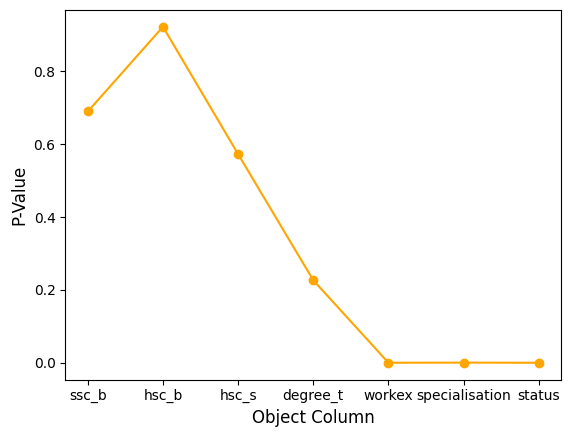

In [8]:
# Find relation between different categorical columns with target column using Chi-Square Test
list1=[]
list2=[]
d=pd.DataFrame()
for i in lst:
  contingency_table = pd.crosstab(df[i], df['status'])
  chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
  list1.append(i)
  list2.append(pval)
d['Object Column']=list1
d['P-value']=list2
print(d)
plt.plot(list1,list2,color='orange',marker='o')
plt.xlabel('Object Column',fontsize=12)
plt.ylabel('P-Value',fontsize=12)
plt.show()

In [9]:
# Drop columns having a high p-value
df=df.drop(columns=['hsc_b','salary','sl_no'],axis=1)

In [10]:
# Apply one-hot encoding to categorical columns of data
df=pd.get_dummies(df,drop_first=True)

In [11]:
df.head()

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,0,67.00,91.00,58.00,55.0,58.80,True,True,False,False,True,False,True,True
1,0,79.33,78.33,77.48,86.5,66.28,False,False,True,False,True,True,False,True
2,0,65.00,68.00,64.00,75.0,57.80,False,False,False,False,False,False,False,True
3,0,56.00,52.00,52.00,66.0,59.43,False,False,True,False,True,False,True,False
4,0,85.80,73.60,73.30,96.8,55.50,False,True,False,False,False,False,False,True


In [12]:
# Replace True/false with 1/0
df=df.replace({True:1,False:0})

In [13]:
df.head()

,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,ssc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,0,67.00,91.00,58.00,55.0,58.80,1,1,0,0,1,0,1,1
1,0,79.33,78.33,77.48,86.5,66.28,0,0,1,0,1,1,0,1
2,0,65.00,68.00,64.00,75.0,57.80,0,0,0,0,0,0,0,1
3,0,56.00,52.00,52.00,66.0,59.43,0,0,1,0,1,0,1,0
4,0,85.80,73.60,73.30,96.8,55.50,0,1,0,0,0,0,0,1


In [14]:
# Check Variance Inflation Factor(VIF) of each column 
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
vif_data

,feature,VIF
0,gender,1.830717
1,ssc_p,98.915260
2,hsc_p,76.932018
3,degree_p,126.210135
4,etest_p,36.351082
5,mba_p,147.270552
6,ssc_b_Others,2.059664
7,hsc_s_Commerce,13.109856
8,hsc_s_Science,12.112229
9,degree_t_Others,1.307597


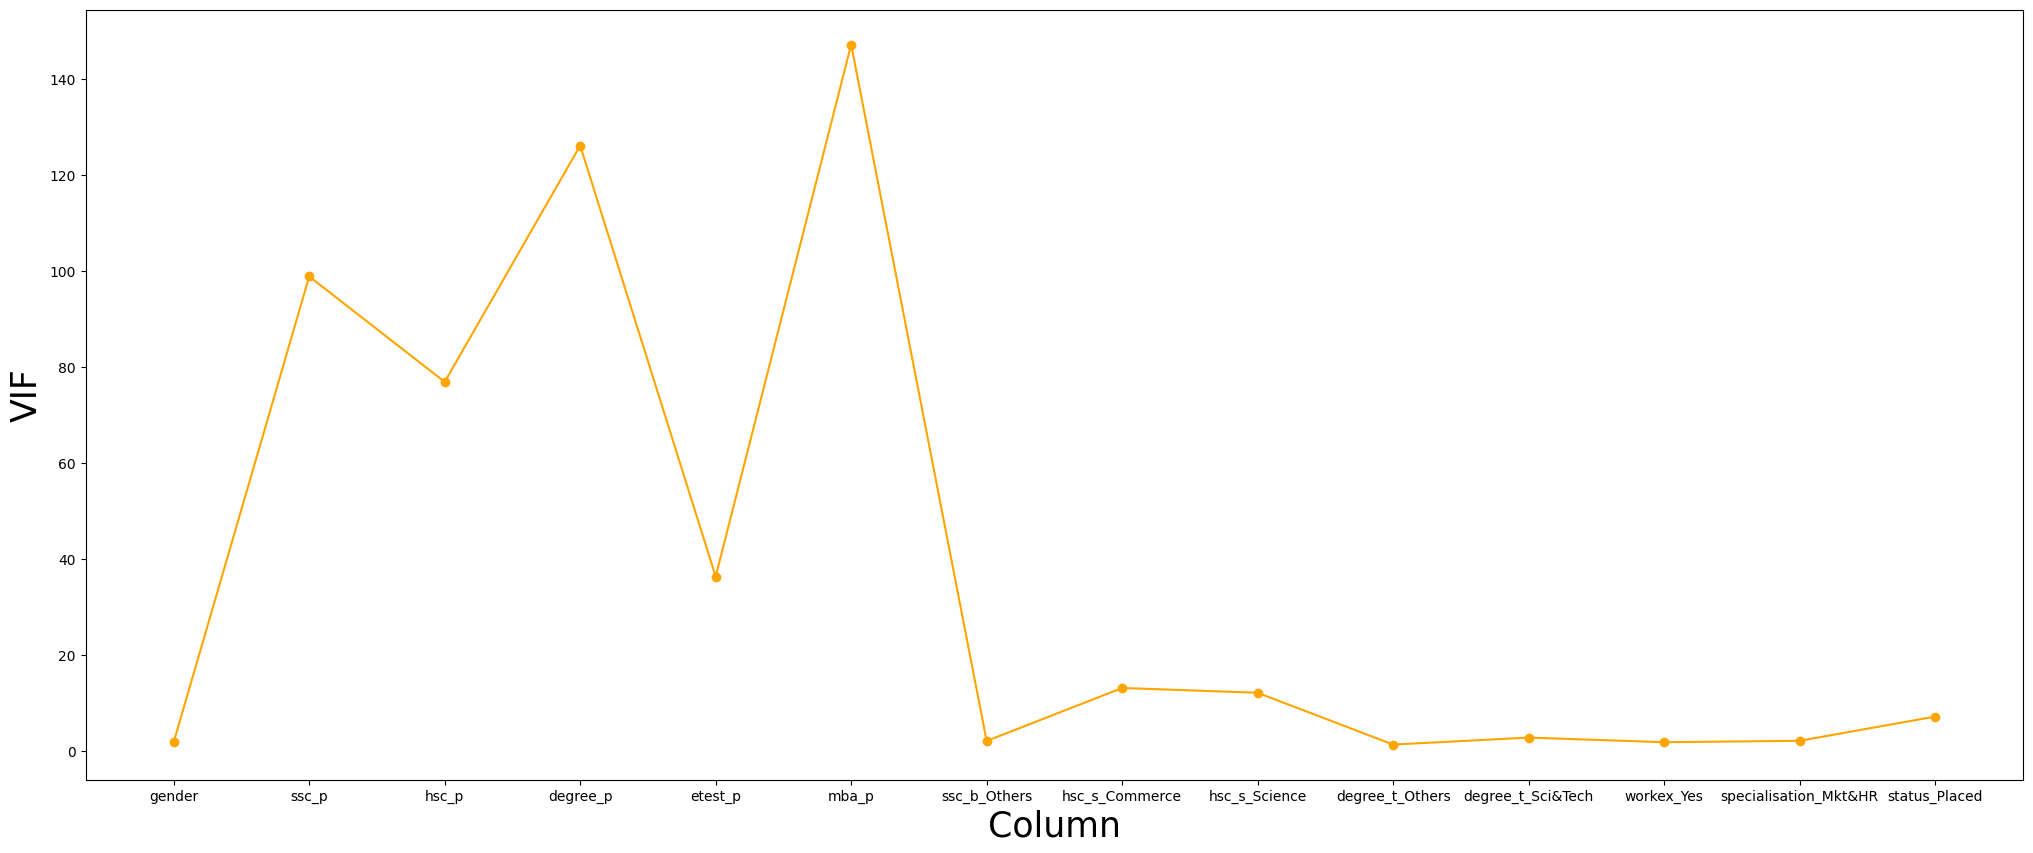

In [15]:
plt.figure(figsize=(25,10))
plt.plot(vif_data['feature'],vif_data['VIF'],color='orange',marker='o')
plt.xlabel('Column',fontsize=25)
plt.ylabel('VIF',fontsize=25)
plt.show()

In [16]:
# Remove columns with a high value of VIF
df=df.drop(columns=['gender','degree_p','ssc_p','mba_p','hsc_s_Commerce','degree_t_Sci&Tech'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hsc_p                  215 non-null    float64
 1   etest_p                215 non-null    float64
 2   ssc_b_Others           215 non-null    int64  
 3   hsc_s_Science          215 non-null    int64  
 4   degree_t_Others        215 non-null    int64  
 5   workex_Yes             215 non-null    int64  
 6   specialisation_Mkt&HR  215 non-null    int64  
 7   status_Placed          215 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 13.6 KB


## Data Visualization

Distribution of continous columns with Swarmplots

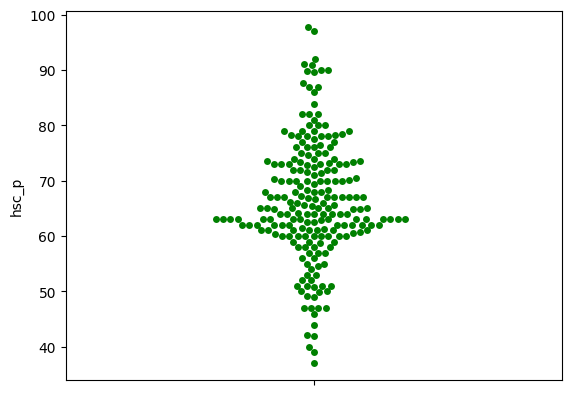

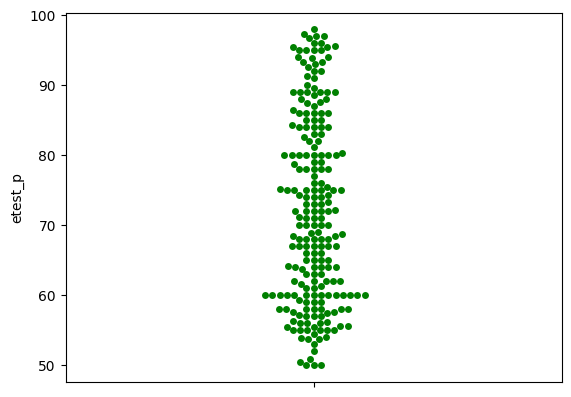

In [18]:
for i in df.columns:
    if df[i].dtypes=='float64':
        sns.swarmplot(df[i],color='green')
        plt.show()

Distribution of categorical columns with Countplots

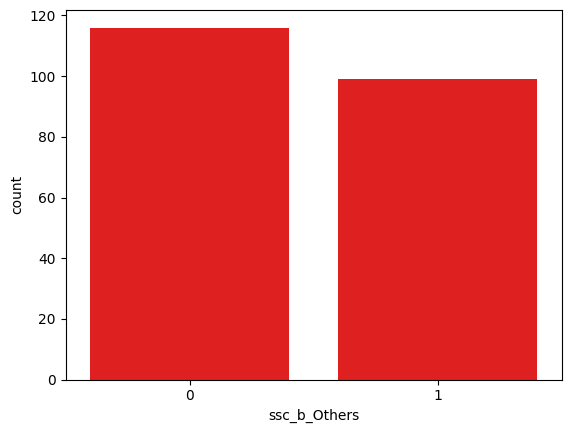

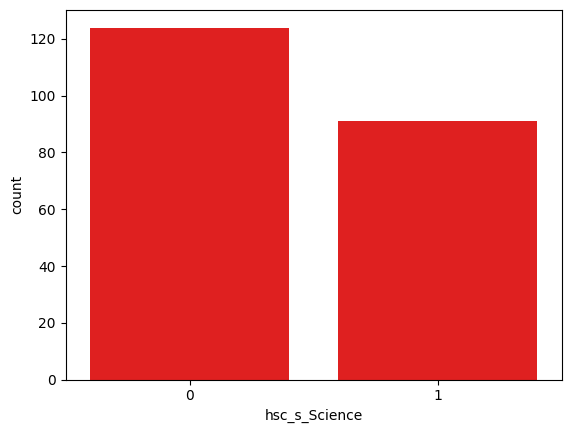

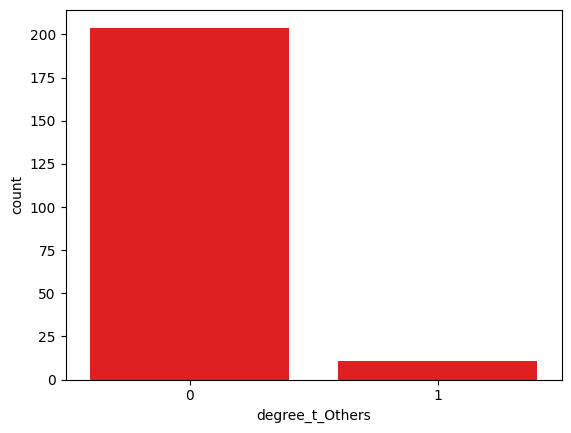

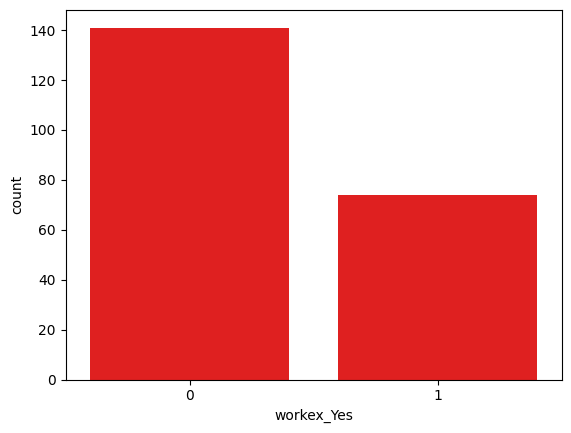

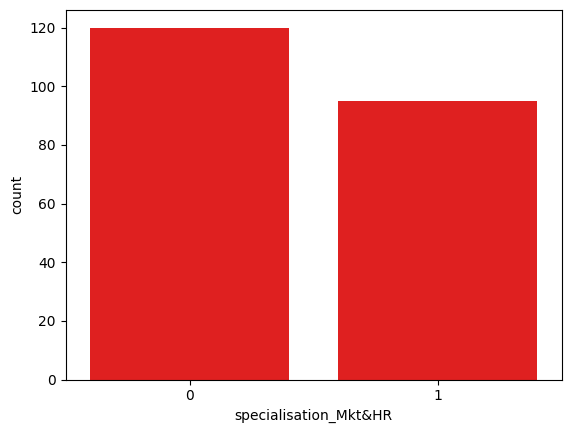

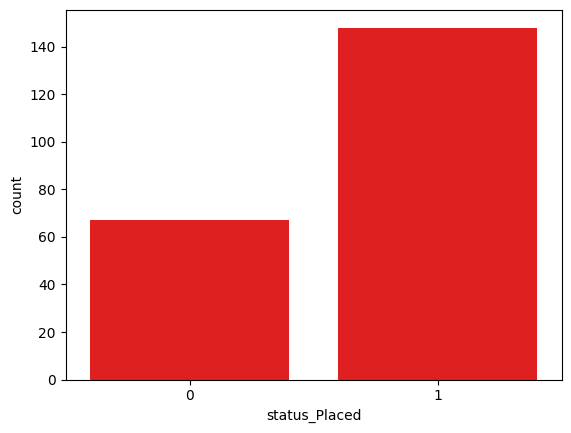

In [19]:
for i in df.columns:
    if df[i].dtypes=='int64':
        sns.countplot(x=df[i],color='red')
        plt.show()

Distribution of status_Placed column with respect to different categories of categorical columns

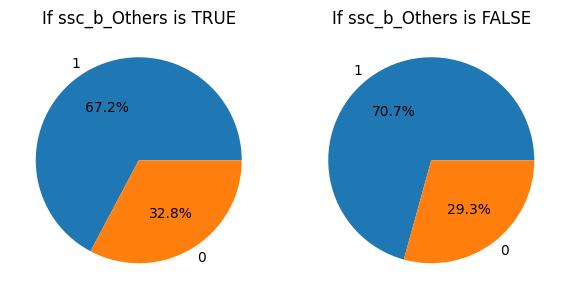

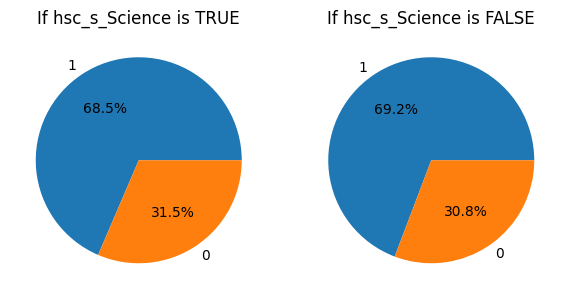

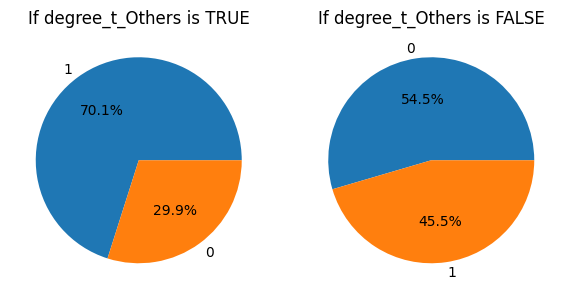

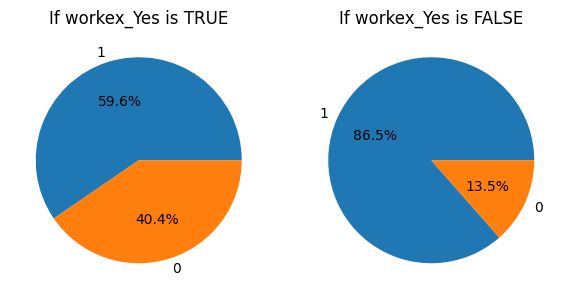

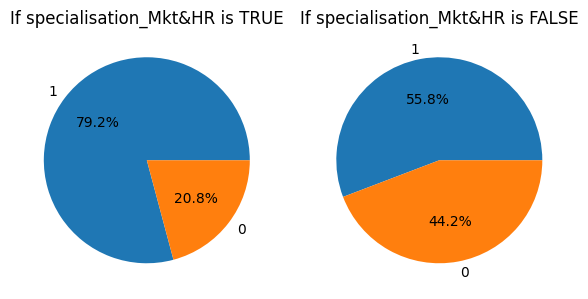

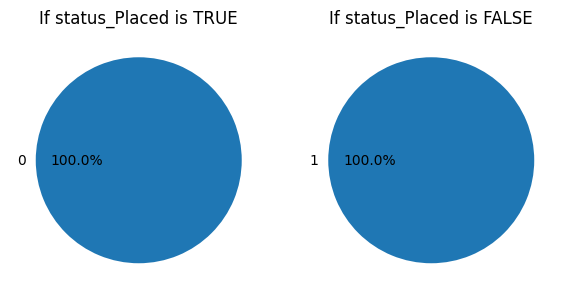

In [20]:
for i in df.columns:
    if df[i].dtypes=='int64':
        fig,axes=plt.subplots(1,2,figsize=(6,3))
        axes[0].pie(df[df[i]==0]['status_Placed'].value_counts().values,
            labels=df[df[i]==0]['status_Placed'].value_counts().keys(),autopct='%1.1f%%')
        axes[0].set_title(f'If {i} is TRUE')
        axes[1].pie(df[df[i]==1]['status_Placed'].value_counts().values,
            labels=df[df[i]==1]['status_Placed'].value_counts().keys(),autopct='%1.1f%%')
        axes[1].set_title(f'If {i} is FALSE')
        plt.tight_layout()
        plt.show()

Distribution of status_Placed column with respect to different categories of continous columns

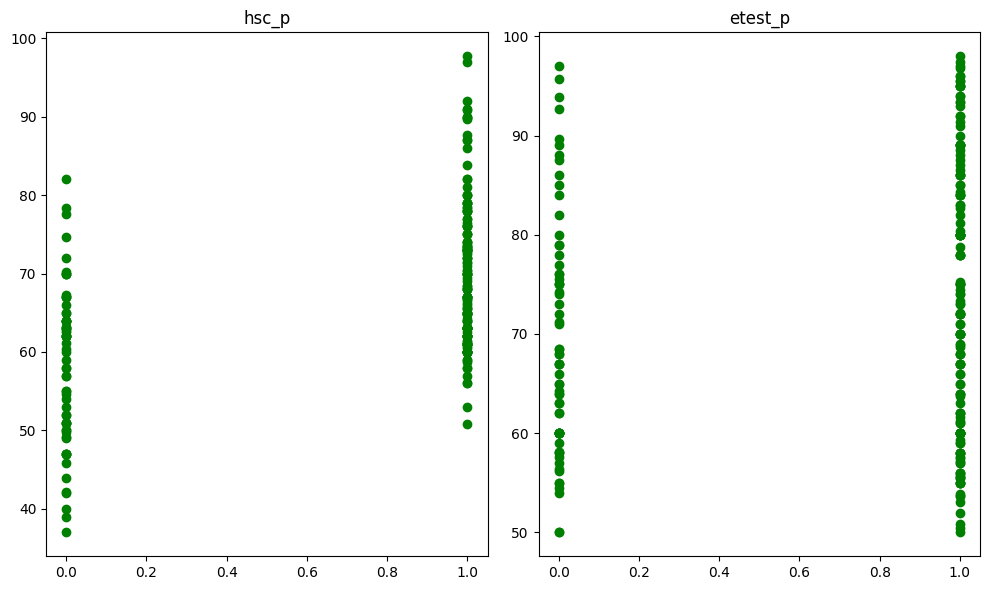

In [21]:
l=[]
for i in df.columns:
    if df[i].dtypes=='float64':
        l.append(i)
fig,axes=plt.subplots(1,2,figsize=(10,6))
axes[0].scatter(df['status_Placed'],df[l[0]],color='green')
axes[0].set_title('hsc_p')
axes[1].scatter(df['status_Placed'],df[l[1]],color='green')
axes[1].set_title('etest_p')
plt.tight_layout()
plt.show()

## Standardization and Splitting of Preprocessed Data

In [22]:
x=df.drop(columns=['status_Placed'],axis=1)# Independent Features(Columns)
y=df['status_Placed']# Target Column

In [23]:
# Standardization using StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x))
x.head()

,0,1,2,3,4,5,6
0,2.268812,-1.291091,1.082459,-0.856663,-0.23221,-0.724446,1.123903
1,1.103448,1.087157,-0.923823,1.167321,-0.23221,1.380364,-0.889757
2,0.153313,0.218908,-0.923823,-0.856663,-0.23221,-0.724446,-0.889757
3,-1.318339,-0.460592,-0.923823,1.167321,-0.23221,-0.724446,1.123903
4,0.668391,1.864806,-0.923823,-0.856663,-0.23221,-0.724446,-0.889757


In [24]:
print(sc.mean_)
print(sc.scale_)

[6.63331628e+01 7.21005581e+01 4.60465116e-01 4.23255814e-01
 5.11627907e-02 3.44186047e-01 4.41860465e-01]
[10.87213658 13.2450461   0.49843454  0.49407523  0.22032966  0.47510211
  0.49660829]


In [25]:
# Splitting into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Model Training

In [26]:
# List of models to be trained
lst=[LogisticRegression(),
     SVC(),
     DecisionTreeClassifier(),
     RandomForestClassifier(),
     GaussianNB(),
     KNeighborsClassifier()]

In [27]:
# Make a log file for training
logging.basicConfig(filename='training.log',
                    level=logging.INFO)

In [28]:
# Train the models
for i in lst:
    start=time()
    i=i.fit(x_train,y_train)
    training_time=time()-start
    logging.info(f'Training Completed in {training_time}')

## Prediction and Evaluation

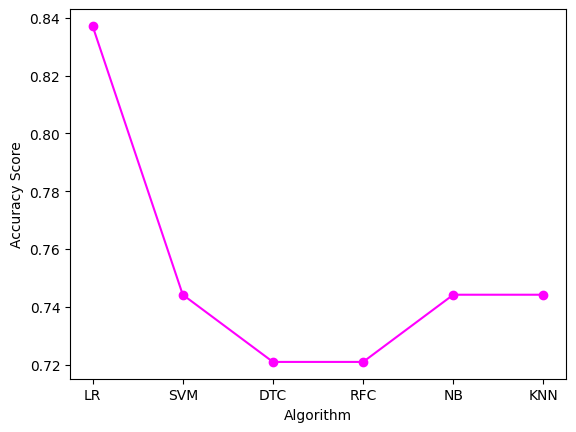

In [29]:
# Predict for testing data using all the models and evaluate each by plotting accuracies of each model given in models list
lst1=[]
lst2=[]
for i in lst:
    y_pred=i.predict(x_test)
    lst1.append(y_pred)#Predictions list
    acc=accuracy_score(y_test,y_pred)
    lst2.append(acc)#Accuracies list
plt.plot(lst2,color='magenta',marker='o')
l1=[0,1,2,3,4,5]
l2=['LR','SVM','DTC','RFC','NB','KNN']
plt.xticks(l1,l2)
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithm')
plt.show()

In [30]:
# Print the highest accuracy
print('Accuracy :',lst2[0])# Highest accuracy is given by first model in the models list

Accuracy : 0.8372093023255814


Highest Accuracy is given by Logistic Regression Model : 83.72%

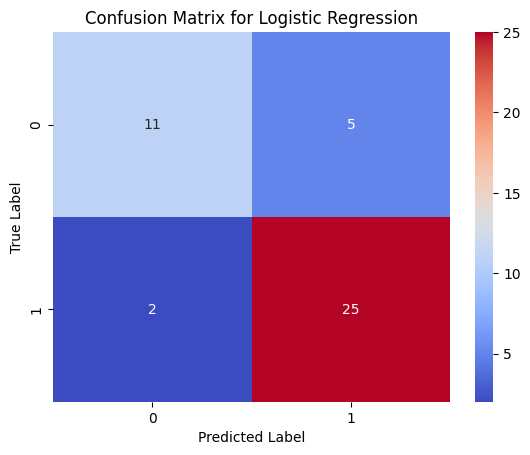

In [31]:
# Plot Confusion Matrix for trained Logistic Regression model
cm=confusion_matrix(y_test,lst1[0])
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [32]:
# Classification Report of trained Logistic Regression Model
report=classification_report(y_test,lst1[0])
report_lines=report.split('\n')
report_lines=report_lines[2:]
data=[]
for line in report_lines:
    if line.strip():
        row=line.strip().split()
        data.append({'class':row[0],
                    'precision':row[1],
                    'recall':row[2]})
pd.DataFrame(data)

,class,precision,recall
0,0,0.85,0.69
1,1,0.83,0.93
2,accuracy,0.84,43
3,macro,avg,0.84
4,weighted,avg,0.84


Logistic Regression is chosen as preferable model.

## Saving the Model

In [33]:
# Save the standard-scaler
with open('scaler.pkl','wb') as f:
    pickle.dump(sc,f)

In [34]:
# Save the model using pickle library
with open('model.pkl','wb') as file:
    pickle.dump(lst[0],file)